<a href="https://colab.research.google.com/github/Ciiku-Kihara/KNN-TITANIC-PROJECT-SPAM-MAIL-PREDICTION/blob/main/KNN_Titanic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the question

### a) Specifying the analysis question

Build a model that determines whether a person survived the titanic accident or not.

### b) Defining the metric for success

Be able to effectively use K Nearest Neighbours(KNN) to build an efficient model that can predict whether a person survived the titanic accident or not with at least 90% accuracy 

### c) Understanding the context

The RMS Titanic sank in the early morning hours of 15 April 1912 in the North Atlantic Ocean, four days into her maiden voyage from Southampton to New York City. The largest ocean liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg.

Her sinking two hours and forty minutes later at 02:20 on Monday, 15 April, resulted in the deaths of more than 1,500 people, making it one of the deadliest peacetime maritime disasters in history.

Titanic sank with over a thousand passengers and crew still on board. Almost all of those who jumped or fell into the water drowned or died within minutes due to the effects of cold shock and incapacitation.
The disaster shocked the world and caused widespread outrage over the lack of lifeboats, lax regulations, and the unequal treatment of the three passenger classes during the evacuation.

### d) Recording the experimental design

- Read and explore the given dataset
- Define the appropriateness of the available data to answer the given question
- Find and deal with outliers, anomalies, and missing data within the dataset
- Perform Exploratory Data Analysis.
- Build a model using KNN algorithm 
- Challenge the solution.
- Optimize the model
- Make conclusions



### e) Data Relevance

The dataset contains adequate information to build my models

## 2. Importing relevant libraries

In [1]:
# Loading necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier

## 3. Loading and checking the data

In [2]:
# Loading our dataset 

titanic =  pd.read_csv('titanic.csv')

In [3]:
# Getting a preview of the first 5 rows

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Determining the number of rows and columns in the dataset

titanic.shape

# This dataset has 891 observations and 12 columns

(891, 12)

In [5]:
# Determining the names of the columns present in the dataset

titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Obtaining descriptive statistics

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Checking if each column is of the appropriate data type

titanic.dtypes

# All the columns are of the appropriate data type.

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 4. External data source validation

The dataset has been validated against the Titanic dataset on Kaggle. The link is provided below

https://www.kaggle.com/hesh97/titanicdataset-traincsv 

The data dictionary can be accessed here:

https://www.kaggle.com/c/titanic/data

## 5. Data cleaning


In [8]:
# Stripping the columns of any probable white spaces

titanic.columns = titanic.columns.str.strip().str.lower()

# Preview of the dataset

titanic.head(2)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
# Checking for presence of null values

titanic.isnull().sum()

# There are 3 columns with missing values. 

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [10]:
# Previewing the columns again

titanic.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [11]:
# Dealing with the missing values
# Dropping the cabin column

titanic.drop('cabin', axis = 1, inplace=True)

# Imputing the median for age

titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Foward filling the null values in the embarked columns

titanic['embarked'] = titanic['embarked'].fillna(method = 'ffill')

# Confirming that there are no null values

titanic.isna().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64

In [12]:
# Getting a preview of the dataset

titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
# Checking if there are any duplicated rows

titanic.duplicated().sum()

# There are no doplicates in the data

0

In [14]:
# Previewing the columns again

titanic.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [15]:
# Checking for any anomalies in the categorical variables

qcol =['survived', 'pclass', 'sex', 'sibsp', 'parch', 'embarked']

for col in qcol:
  print(col, ':', titanic[col].unique(), '\n')

# The categorical columns have no errors in their entries

survived : [0 1] 

pclass : [3 1 2] 

sex : ['male' 'female'] 

sibsp : [1 0 3 4 2 5 8] 

parch : [0 1 2 5 3 4 6] 

embarked : ['S' 'C' 'Q'] 



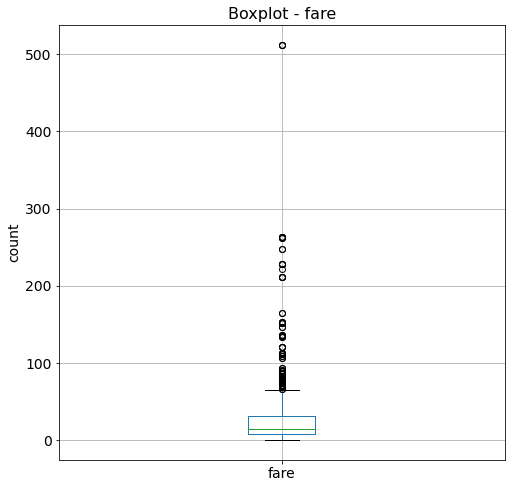

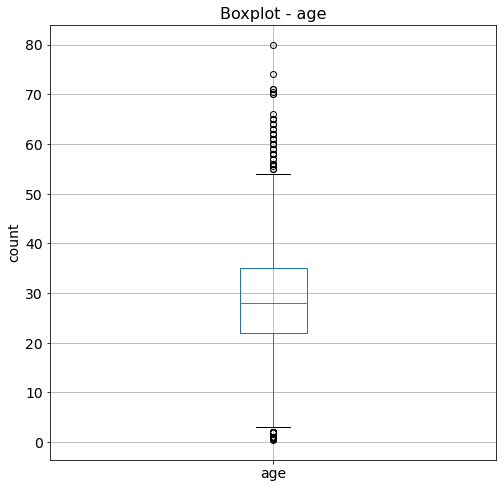

In [16]:
# Checking for Outliers

numna = ['fare', 'age']

for column in numna:
    plt.figure(figsize=(8,8))
    titanic.boxplot([column], fontsize= 14)
    plt.ylabel('count', fontsize = 14)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)

# Both age and fare have outliers

In [17]:
# Determining how many rows would be lost if outliers were removed

# Calculating our first, third quantiles and then later our IQR
# ---
Q1 = titanic.quantile(0.25)
Q3 = titanic.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range
# ---
# 
titanic_new = titanic[~((titanic < (Q1 - 1.5 * IQR)) | (titanic > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(titanic_new.shape)

# Printing the shape of our old dataset
# ---
#
print(titanic.shape)

# Number of rows removed

rows_removed = titanic.shape[0] - titanic_new.shape[0]
print('Number of rows removed:', rows_removed)

# Percentage of rows removed of the percentage
row_percent = (rows_removed/titanic.shape[0]) * 100
print('Percentage of rows removed:', row_percent)

# There will be no need to remove the outliers since it 
# doesn't seem like there are obvious errors in the data.
# Furthermore, removing outliers will reduce the diversity of the dataset 

(577, 11)
(891, 11)
Number of rows removed: 314
Percentage of rows removed: 35.24130190796858


In [18]:
# Dropping the unnecessary columns

titanic.drop(['ticket', 'passengerid'], axis=1, inplace=True)

In [19]:
# Feature extraction
# Splitting the name column to get only the title

title = [i.split(",")[1].split(".")[0].strip() for i in titanic['name']]

titanic['title'] = pd.Series(title)

titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [20]:
# Dropping the name column

titanic.drop('name', axis=1, inplace=True)

# Checking on the columns again
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


## 6. Exploratory Data Analysis

### a) Univariate Analysis

In [21]:
# Previewing the columns

titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'title'],
      dtype='object')

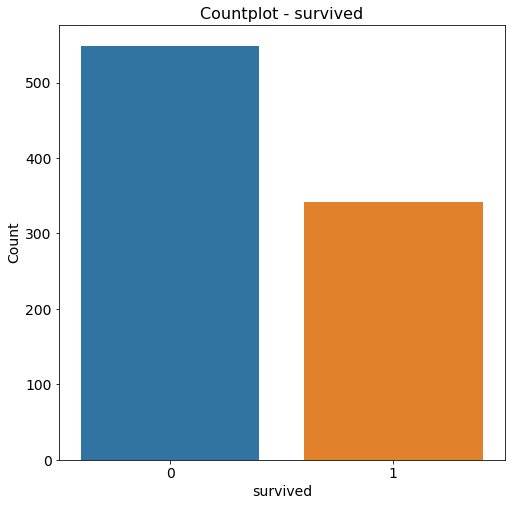

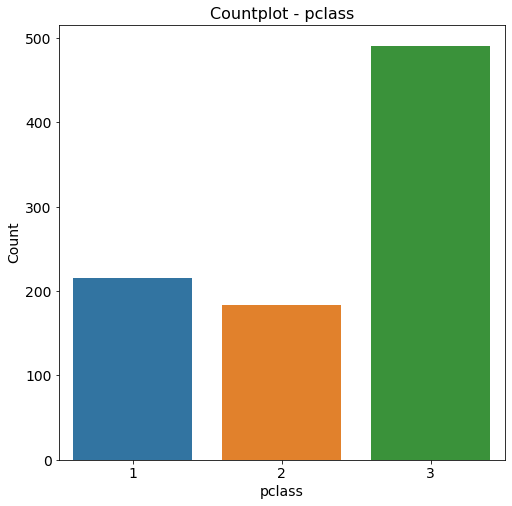

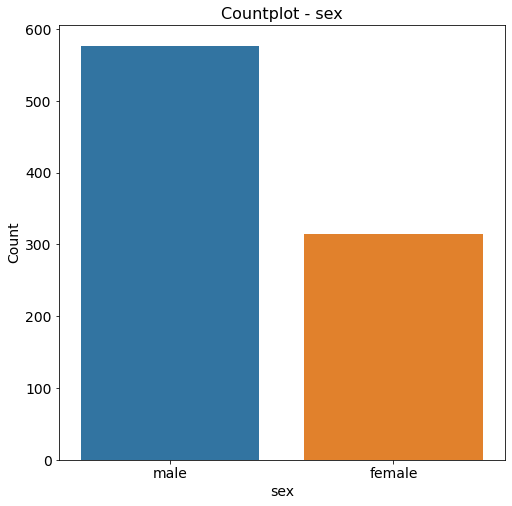

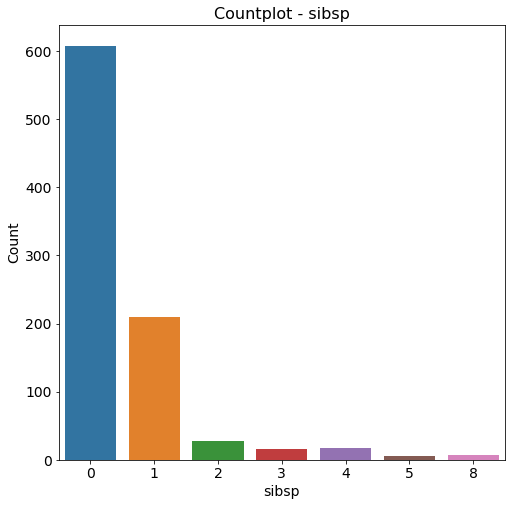

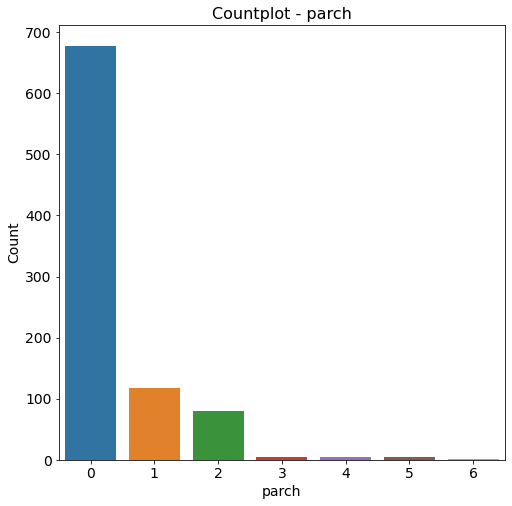

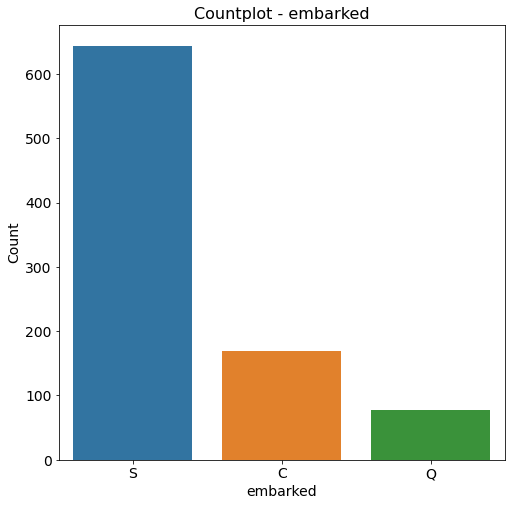

In [22]:
# Countplots for the categorical columns

qcol = ['survived', 'pclass', 'sex', 'sibsp', 'parch',
       'embarked']

for i in qcol:
  plt.figure(figsize= (8,8))
  sns.countplot(x = titanic[i])
  plt.title('Countplot - {}'.format(i), fontsize = 16)
  plt.xlabel(i , fontsize = 14)
  plt.ylabel('Count', fontsize = 14)
  plt.xticks(fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.show()

From these countplots, we can make the following observations:
Of the total number recorded

* Those who did not survive were more than those who did. Approximately 600 passengers did not survive while about 300 passengers survived
* Most of the passengers were in ticket class(pclass) 3 followed by passengers in ticket class 1. Ticket class 2 had the least number of passengers.
* Of the total number of passengers, about 560 passengers were male and 300 were female.
* Approximately 600 passengers had no siblings or spouses(sibsp) on board. About 200 passengers had 1 sibling or spouse on board.
* More than 650 passengers had no parent or child(parch) on board
*Approximately 650 passengers embarked from Southampton port(S), about 180 passengers from the Cherbourg(C) port while less than 100 passengers from the Queenstown port(Q).

In [23]:
# Frequency of the titles

titanic['title'].value_counts()

# All the titles from Master to Don I will title as 'Other'

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Sir               1
the Countess      1
Jonkheer          1
Ms                1
Lady              1
Mme               1
Don               1
Capt              1
Name: title, dtype: int64

In [24]:
titanic['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [25]:
# Replacing the less popular titles with other

other = ['Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']

titanic['title'] = titanic['title'].replace(other, 'Other')

titanic['title'].value_counts()

# Most of the passengers went by the title Mr while 67 of the 
# went by the less common titles like Mademoiselle, Jonkheer and so forth

Mr       517
Miss     182
Mrs      125
Other     67
Name: title, dtype: int64

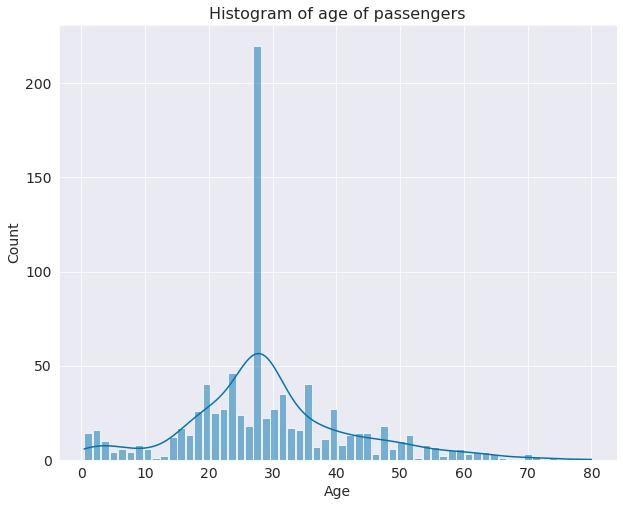

In [26]:
# Histogram on age to see the shape of the distribution

def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=titanic,  bins = bins , shrink= 0.9, kde = True)

histogram('age', 60)
plt.title('Histogram of age of passengers', fontsize = 16)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()



In [27]:
# Measures of central tendency

titanic['age'].describe()

# The mean age is 29 
# The maximum age is 80
# The minimum age is 0.42
# 25% of passengers are aged below 22 while 50% of passengers are aged below
# 28 and 75% of passengers are aged below 35

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [28]:
# Defining a variable to calculate variation

def variation(var):
  print('The skewness is:', titanic[var].skew())
  print('The kurtosis is:', titanic[var].kurt())
  print('The coefficient of variation is:', titanic[var].std()/titanic[var].mean())

# Checking on coefficent of variance, skewness and kurtosis

variation('age')

# The distribution is fairly symmetrical and is slightly leptokurtic.
# There is low variance in the age of the passengers

The skewness is: 0.5102446555756495
The kurtosis is: 0.9938710163801736
The coefficient of variation is: 0.443426254518323


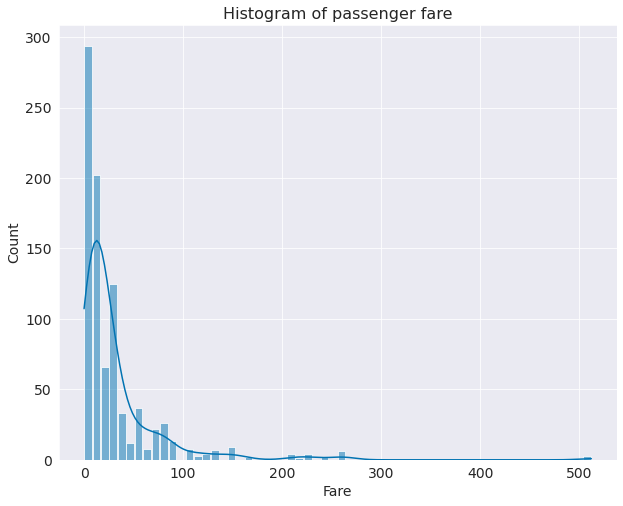

In [29]:
# Histogram of passenger fare

histogram('fare', 60)
plt.title('Histogram of passenger fare', fontsize = 16)
plt.xlabel('Fare', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()


In [30]:
# Measures of central tendency

titanic['fare'].describe()

# The mean fare is 32.2 
# The maximum fare  is 512
# The minimum fare is 0
# 25% of passenger fares are below 7.9 while 50% of pasenger fares are below
# 14 and 75% of passenger fares are below 31.

# The fare price of 512 represents the prce for the luxury tickets. It is not an error

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [31]:
# Checking on coefficent of variance, skewness and kurtosis

variation('fare')

# The distribution is skewed to the right and is leptokurtic.
# There is high variance in fare values

The skewness is: 4.787316519674893
The kurtosis is: 33.39814088089868
The coefficient of variation is: 1.5430725278408517


### b) Bivariate Analysis

In [32]:
# Preview of the coluns

titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'title'],
      dtype='object')

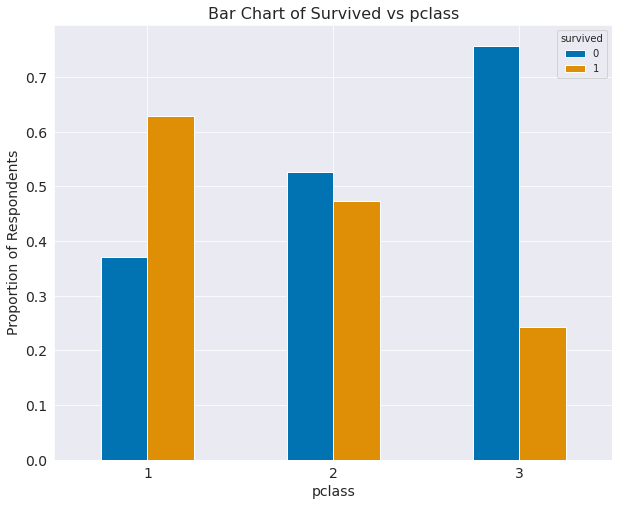

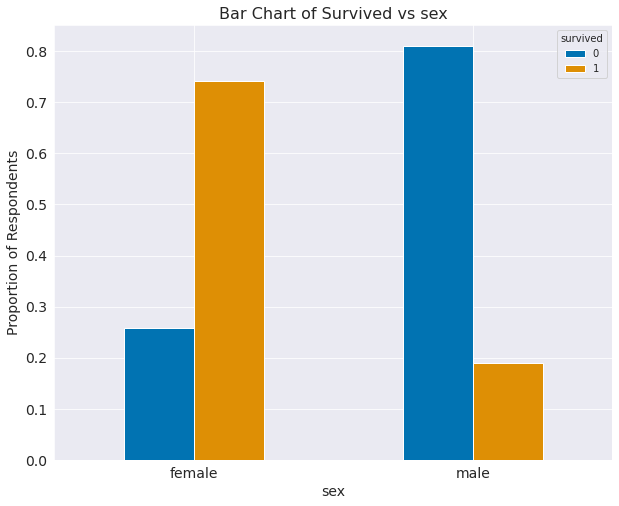

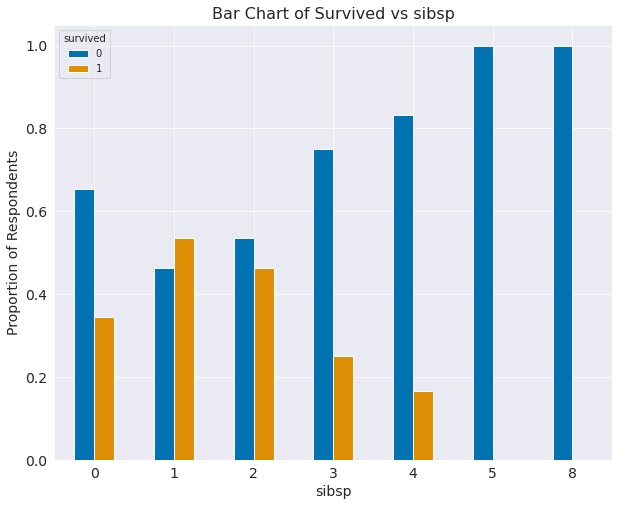

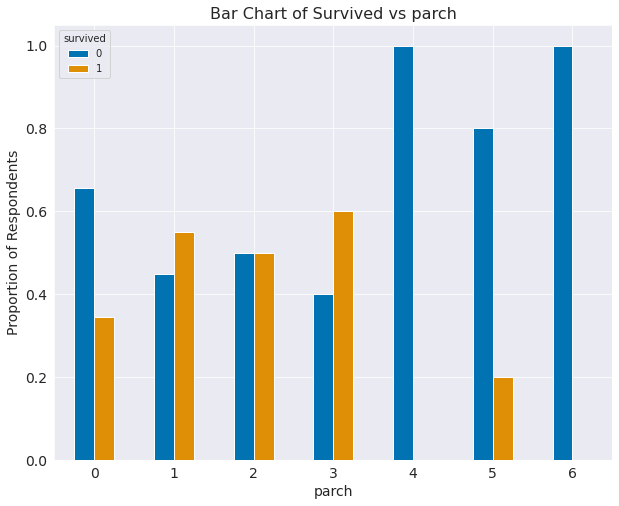

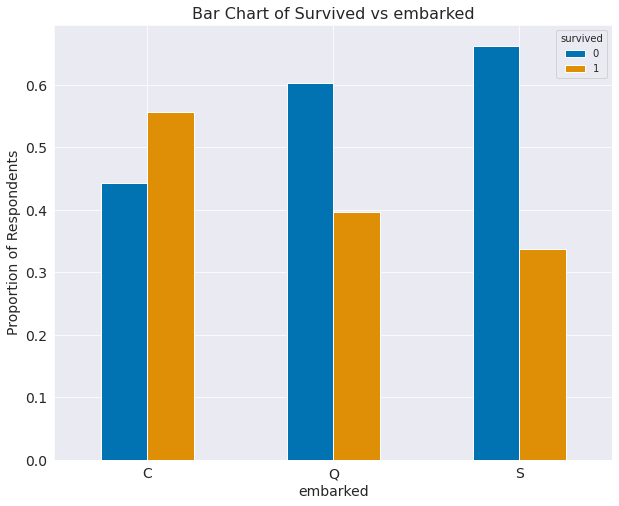

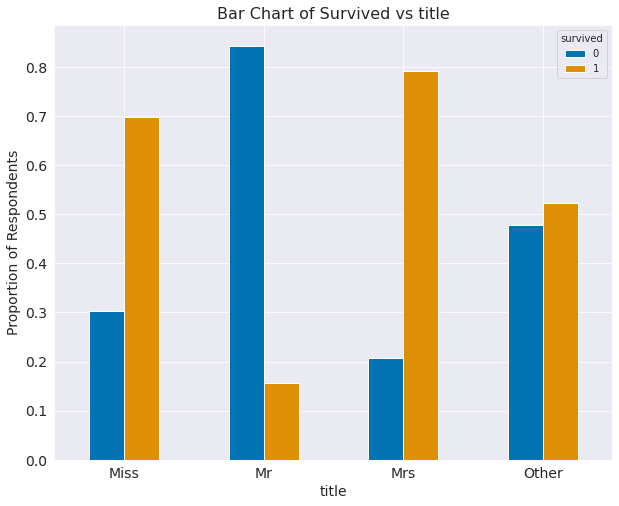

In [33]:
# Bar charts to compare the whether a passenger survived vs the different categorical variables 
qcol1 =['pclass', 'sex', 'sibsp', 'parch',
       'embarked', 'title']

for i in qcol1:
  table=pd.crosstab(titanic[i],titanic['survived'])
  table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize = (10,8), stacked=False)
  plt.title('Bar Chart of Survived vs {}'.format(i), fontsize = 16)
  plt.xlabel(i, fontsize = 14)
  plt.ylabel('Proportion of Respondents', fontsize = 14)
  plt.xticks(rotation = 360, fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.show()
  print(' ')
  print(' ')


The observations made from the graphs above are:

- 62% of those in ticket class 1 survived, 48% of those in ticket class 2 survived and only 25% of those in ticket class 3 survived.
- More than 70% of females survived while less than 20% of males survived.
- All of those who had 8 or 5 siblings or spouses on board died. Almost 70% of those who had no siblings or spouses on board did not survive.
- More than 65% of those who had no parents or children on board died. However, the number of passengers who survived was higher for those who had 1 or 3 parents or siblings.
- Of those who embarked from Cherbourg port 55% survived. Of those who embarked from Queenstown port, 40% survived and of those who embarked from Southampton Port, about 34% survived.  
- The number of passengers who survived was higher for those who took the title 'Mrs', 'Miss' or had other less common titles. Less than 20% of individuals with the title 'Mr' survived

In [34]:
# Looking at the relationship between fare and the port that
# the passengers embarked from

titanic.groupby('embarked')['fare'].describe()

# Those who embarked from Cherbourg paid more on average than those who embarked 
# from the other 2 ports.

,count,mean,std,min,25%,50%,75%,max
embarked,,,,,,,,
C,169.0,60.072759,83.677089,4.0125,13.7917,29.70,79.2,512.3292
Q,78.0,14.131465,15.992637,6.7500,7.7500,7.75,15.5,90.0000
S,644.0,27.079812,35.887993,0.0000,8.0500,13.00,27.9,263.0000


In [35]:
# Looking at the relationship between fare and sex

titanic.groupby('sex')['fare'].describe()

# Females paid more on average than men

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,314.0,44.479818,57.997698,6.75,12.071875,23.0,55.00,512.3292
male,577.0,25.523893,43.138263,0.00,7.895800,10.5,26.55,512.3292


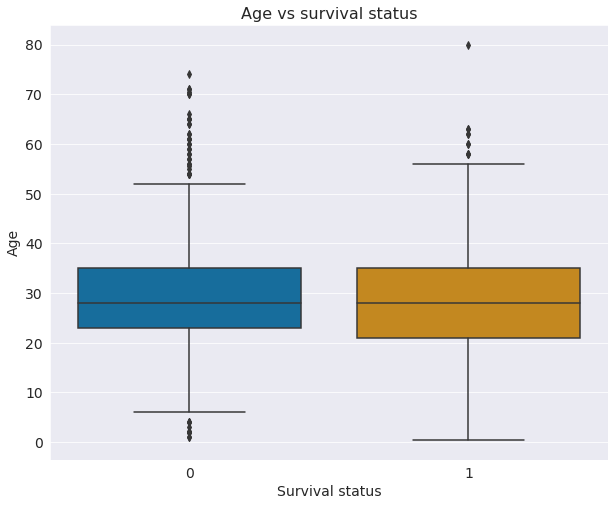

In [36]:
# Comparing age and survival status

plt.figure(figsize=(10,8))
sns.boxplot(x = titanic['survived'], y= titanic['age'])
plt.title('Age vs survival status', fontsize = 16)
plt.xlabel('Survival status', fontsize = 14)
plt.ylabel('Age', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# There is not much of a difference in the ages for those who survived and those that
# did not survive.

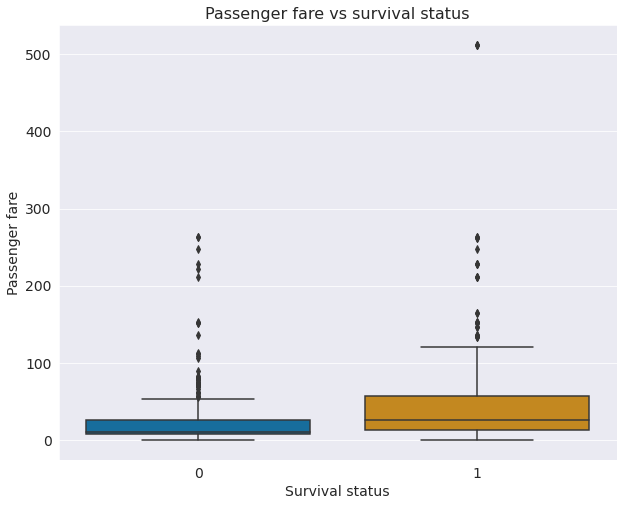

In [37]:
# Comparing fare and survival status

plt.figure(figsize=(10,8))
sns.boxplot(x = titanic['survived'], y= titanic['fare'])
plt.title('Passenger fare vs survival status', fontsize = 16)
plt.xlabel('Survival status', fontsize = 14)
plt.ylabel('Passenger fare', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# Those who survived had a higher median fare than those who did not

### c) Multivariate Analysis 

In [38]:
# Getting a preview of the columns again

titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'title'],
      dtype='object')

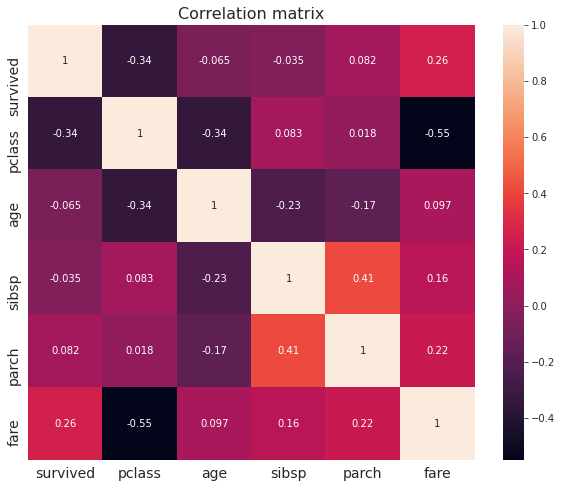

In [39]:
# Correlation Heatmap for numerical features

plt.figure(figsize=(10,8)) 
sns.heatmap(titanic.corr(),annot=True)
plt.title('Correlation matrix', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14) 
plt.show()

# There is a moderately high correlation between sibsp and parch.
# The correlation coefficient between the two is 0.41

## 7. Feature Selection by checking for multicollinearity
> Multicollinearity is the occurrence of high intercorrelations among 2 or more independent variables in a model with multiple features.

> Testing for multicollinearity is extremely important because it can lead to:

* Inaccurate estimates of the regression coefficients
* Inflation of the standard errors of the regression coefficients
* False and non-significant p-values
* Degredation of the predictability of the model

Checking for correlations in independent variables helps to do features selection. Any variables with a VIF value above 4 will be dropped and will not be used in building the model

In [40]:
# Encoding the categorical columns

for i in qcol1:
  titanic[i] = titanic[i].astype('category')
  titanic[i] = titanic[i].cat.codes

# Confirming the changes
for i in qcol1:
  print(i, ':', titanic[i].unique(), '\n')
 
print(titanic.dtypes)

pclass : [2 0 1] 

sex : [1 0] 

sibsp : [1 0 3 4 2 5 6] 

parch : [0 1 2 5 3 4 6] 

embarked : [2 0 1] 

title : [1 2 0 3] 

survived      int64
pclass         int8
sex            int8
age         float64
sibsp          int8
parch          int8
fare        float64
embarked       int8
title          int8
dtype: object


In [41]:
# Specifying X and y

X = titanic.drop('survived', 1)
y = titanic['survived']

In [42]:
# Checking for multicollinearity

correlations = X.corr()
correlations

,pclass,sex,age,sibsp,parch,fare,embarked,title
pclass,1.000000,0.131900,-0.339898,0.078141,0.018443,-0.549500,0.168430,-0.110599
sex,0.131900,1.000000,0.081163,-0.123164,-0.245489,-0.182333,0.113807,0.206310
age,-0.339898,0.081163,1.000000,-0.254098,-0.172482,0.096688,-0.024149,0.077593
sibsp,0.078141,-0.123164,-0.254098,1.000000,0.423338,0.163254,0.067649,0.167633
parch,0.018443,-0.245489,-0.172482,0.423338,1.000000,0.216225,0.041732,0.154579
fare,-0.549500,-0.182333,0.096688,0.163254,0.216225,1.000000,-0.228364,0.002254
embarked,0.168430,0.113807,-0.024149,0.067649,0.041732,-0.228364,1.000000,0.022960
title,-0.110599,0.206310,0.077593,0.167633,0.154579,0.002254,0.022960,1.000000


In [43]:
# Creating the VIF dataframe

VIF = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)
VIF

,pclass,sex,age,sibsp,parch,fare,embarked,title
pclass,1.733192,-0.206707,0.420758,-0.172003,-0.177269,0.932508,-0.032143,0.256560
sex,-0.206707,1.198344,-0.074194,0.075524,0.305706,0.008846,-0.111816,-0.321703
age,0.420758,-0.074194,1.229969,0.244667,0.091756,0.029017,-0.044460,-0.087837
sibsp,-0.172003,0.075524,0.244667,1.343908,-0.412347,-0.257296,-0.101306,-0.212227
parch,-0.177269,0.305706,0.091756,-0.412347,1.373470,-0.301542,-0.095719,-0.230105
fare,0.932508,0.008846,0.029017,-0.257296,-0.301542,1.675363,0.251097,0.179261
embarked,-0.032143,-0.111816,-0.044460,-0.101306,-0.095719,0.251097,1.084583,0.029274
title,0.256560,-0.321703,-0.087837,-0.212227,-0.230105,0.179261,0.029274,1.171631


In [44]:
# Extracting the VIF values

pd.Series(np.diag(VIF), index=[VIF.columns])

# There is no multicollinearity

pclass      1.733192
sex         1.198344
age         1.229969
sibsp       1.343908
parch       1.373470
fare        1.675363
embarked    1.084583
title       1.171631
dtype: float64

There is no multicollinearity so no features will be dropped.

## 8. Implementing the solution

### a) Building my model using K Nearest Neighbors algorithm.

KNN is a non parametric algorithm that can be used with both classification and regression problems. However, it is more widely used to solve classification problems.

KNN works by finding the distances between a new point and all the examples in the data, selecting the specified number examples (K) closest to the new point, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

Some of the advantages of using KNN are:
* It is easy to use 
* Has quick calculation time
* Does not make any assumptions about the data (non-parametric)




In [45]:
# Splitting into train and test using 80-20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

# fitting and making predictions

classifier = KNeighborsClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluating the model

print('Accuracy:', accuracy_score(y_test, y_pred), '\n')
print(confusion_matrix(y_test, y_pred), '\n')
print( classification_report(y_test, y_pred))

# At 80-20 split ratio, the accuracy is 70.9%

Accuracy: 0.7094972067039106 

[[87 26]
 [26 40]] 

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       113
           1       0.61      0.61      0.61        66

    accuracy                           0.71       179
   macro avg       0.69      0.69      0.69       179
weighted avg       0.71      0.71      0.71       179



* With an 80-20 split the accuracy is 70.9%

From the first row of the confusion matrix we see that:
* 87 passengers were correctly classified as having not survived  
* 26 were wrongly classified as having not survived.

From the second row of the confusion matrix we see that 
* 26 passengers where wrongly classified as having survived 
* 93 were correctly classified as having survived

The recall is 77% 


In [46]:
# Splitting into train and test using 70-30 ratio

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3, random_state = 99)

# fitting and making predictions

classifier = KNeighborsClassifier()

classifier.fit(X_train1, y_train1)

y_pred1 = classifier.predict(X_test1)

# Evaluating the model

print('Accuracy:', accuracy_score(y_test1, y_pred1), '\n')
print(confusion_matrix(y_test1, y_pred1), '\n')
print( classification_report(y_test1, y_pred1))

# At 70-30 split ratio, the accuracy has risen to 73.1%

Accuracy: 0.7313432835820896 

[[140  34]
 [ 38  56]] 

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       174
           1       0.62      0.60      0.61        94

    accuracy                           0.73       268
   macro avg       0.70      0.70      0.70       268
weighted avg       0.73      0.73      0.73       268



* With an 70-30 split the accuracy is 73.1%

From the first row of the confusion matrix we see that:
* 140 passengers were correctly classified as having not survived  
* 34 were wrongly classified as having not survived.

From the second row of the confusion matrix we see that 
* 38 passengers where wrongly classified as having survived 
* 56 were correctly classified as having survived

The recall is 80%

In [47]:
# Splitting into train and test using 60-40 ratio

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.4, random_state = 99)

# fitting and making predictions

classifier = KNeighborsClassifier()

classifier.fit(X_train2, y_train2)

y_pred2 = classifier.predict(X_test2)

# Evaluating the model

print('Accuracy:', accuracy_score(y_test2, y_pred2), '\n')
print(confusion_matrix(y_test2, y_pred2), '\n')
print( classification_report(y_test2, y_pred2))

# At 60-40 split ratio, the accuracy of the model dropped to 69.7%
# which was lower than the 80-20 split

# I will choose to optimize the 70-30 option

Accuracy: 0.6974789915966386 

[[169  61]
 [ 47  80]] 

              precision    recall  f1-score   support

           0       0.78      0.73      0.76       230
           1       0.57      0.63      0.60       127

    accuracy                           0.70       357
   macro avg       0.67      0.68      0.68       357
weighted avg       0.71      0.70      0.70       357



* With an 60-40 split the accuracy is 69.7%

From the first row of the confusion matrix we see that:
* 169 passengers were correctly classified as having not survived  
* 61 were wrongly classified as having not survived.

From the second row of the confusion matrix we see that 
* 47 passengers where wrongly classified as having survived 
* 80 were correctly classified as having survived

The recall is 73%


The 70-30 split recoreded the highest accuracy and recall before any optimiation technique is put in place. Therefore I will optimize the model built using the 70-30 split

**Optimizing the model**

KNN can be optimized using the following techniques:
* Dimensionality Reduction with Linear Discriminant Analysis
* Rescaling our data which makes the distance metric more meaningful. 
* Changing the distance metric for different applications.
* Implementing weighted voting
* Applying  additional appropriate nearest-neighbor techniques

In [48]:
# Performing feature scaling

scale = MinMaxScaler()
X_train1 = scale.fit_transform(X_train1)
X_test1 = scale.transform(X_test1)

# fitting and making predictions

classifier = KNeighborsClassifier()

classifier.fit(X_train1, y_train1)

y_pred1 = classifier.predict(X_test1)

# Evaluating the model

print('Accuracy:', accuracy_score(y_test1, y_pred1), '\n')
print(confusion_matrix(y_test1, y_pred1), '\n')
print( classification_report(y_test1, y_pred1))

# After feature scaling, the accuracy has risen from 73.1% to 80.2%
# The recall also increased from 80% to 86%

Accuracy: 0.8022388059701493 

[[149  25]
 [ 28  66]] 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       174
           1       0.73      0.70      0.71        94

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [49]:
# Hyper parameter tuning

param_grid = {'n_neighbors' : np.arange(3,21,2),
              'algorithm' : ['auto', 'kd_tree'],
              'metric' : ['minkowski', 'euclidean', 'manhattan'],
              'weights' : ['uniform', 'distance']}

search = GridSearchCV(classifier, param_grid = param_grid, cv = 10, scoring= 'accuracy' )

In [50]:
# Getting the best parameters

search.fit(X_train1, y_train1)
print(search.best_params_)
print(search.best_score_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
0.836226318484383


In [51]:
# Fitting and making predictions using the suggested parameters

classifier = KNeighborsClassifier(n_neighbors=11,  metric='manhattan')

classifier.fit(X_train1, y_train1)

y_pred1 = classifier.predict(X_test1)

# Evaluating the model

print('Accuracy:', accuracy_score(y_test1, y_pred1), '\n')
print(confusion_matrix(y_test1, y_pred1), '\n')
print( classification_report(y_test1, y_pred1))

# The recall after optimizing the model increased from 86% to 88%. However,
# the accuracy if the model did not increase by much

Accuracy: 0.8059701492537313 

[[153  21]
 [ 31  63]] 

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       174
           1       0.75      0.67      0.71        94

    accuracy                           0.81       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.80      0.81      0.80       268



In [52]:
# Attempting to use dimensionality reduction

lda = LDA(n_components=1)
X_train1 = lda.fit_transform(X_train1, y_train1)
X_test1 = lda.transform(X_test1)

classifier.fit(X_train1, y_train1)

y_pred1 = classifier.predict(X_test1)

# Evaluating the model

print('Accuracy:', accuracy_score(y_test1, y_pred1), '\n')
print(confusion_matrix(y_test1, y_pred1), '\n')
print( classification_report(y_test1, y_pred1))

# With dimensionality reduction there is a reduction in the accuracy of the model


Accuracy: 0.7947761194029851 

[[144  30]
 [ 25  69]] 

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       174
           1       0.70      0.73      0.72        94

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.80      0.79      0.80       268



## 9. Challenging the solution

- I will compare the performance of KNN with Catboost


In [53]:
# Instaling catboost

!pip install catboost

     |████████████████████████████████| 67.3MB 59kB/s 


In [54]:
# Converting age and fare to integers

X['age'] = X['age'].astype('int64')
X['fare'] = X['fare'].astype('int64')

# Changing the data to categorical columns

for i in qcol1:
  X[i] = X[i].astype('category')

titanic.dtypes

# Confirming the changes

X.dtypes

pclass      category
sex         category
age            int64
sibsp       category
parch       category
fare           int64
embarked    category
title       category
dtype: object

In [55]:
# Building the model

from catboost import CatBoostClassifier

# Splitting X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

# Building the model

cat = CatBoostClassifier(learning_rate=0.2, max_depth=5, iterations=1010)

#Fitting the model

cat.fit(X_train,y_train, cat_features= qcol1)

# Making predictions

y_pred_cat = cat.predict(X_test)

# Checking for accuracy

print('Accuracy:', accuracy_score(y_test, y_pred_cat), '\n')
print(confusion_matrix(y_test, y_pred_cat), '\n')
print( classification_report(y_test, y_pred_cat))

# With a learning rate of 0.2, max_depth of 5 and 1010 iterations
# the accuracy came up to 83.9%

0:	learn: 0.5854867	total: 51.4ms	remaining: 51.9s
1:	learn: 0.5417400	total: 53.1ms	remaining: 26.7s
2:	learn: 0.5065666	total: 55.2ms	remaining: 18.5s
3:	learn: 0.4731185	total: 57.3ms	remaining: 14.4s
4:	learn: 0.4568029	total: 59.5ms	remaining: 12s
5:	learn: 0.4319645	total: 61.5ms	remaining: 10.3s
6:	learn: 0.4286035	total: 62.6ms	remaining: 8.97s
7:	learn: 0.4136887	total: 64.7ms	remaining: 8.11s
8:	learn: 0.4020268	total: 66.9ms	remaining: 7.44s
9:	learn: 0.3972330	total: 68.9ms	remaining: 6.89s
10:	learn: 0.3886785	total: 71.1ms	remaining: 6.46s
11:	learn: 0.3831682	total: 73.4ms	remaining: 6.11s
12:	learn: 0.3761396	total: 75.7ms	remaining: 5.81s
13:	learn: 0.3722845	total: 78.2ms	remaining: 5.56s
14:	learn: 0.3708062	total: 80.6ms	remaining: 5.35s
15:	learn: 0.3686750	total: 82.9ms	remaining: 5.15s
16:	learn: 0.3668241	total: 85.2ms	remaining: 4.97s
17:	learn: 0.3633297	total: 87.3ms	remaining: 4.81s
18:	learn: 0.3614589	total: 89.5ms	remaining: 4.67s
19:	learn: 0.3614589	tot

## 10. Conclusion

Some of the conclusions that can be made from this project:

- For this specific dataset, the KNN optimization procedure that worked best was feature scaling.
- Changing the distance metric to Manhattan increased the recall by 2%
- When compared to the model created using catboost, Catboost did better. It recorded a higher recall by 1% and higher accuracy by about 3%

# Recommendations

Some of the recommendations I would make are:

* When building a model using KNN, perform feature scaling to improve the accuracy of your model. If your data is skewed, perform normalization. If it is normal, perform standardization.
* Try to play around with other algorithms such as Random Forest and Gradient Boost and compare model performance.
* Acquire a dataset with high dimensionality and perform dimensionality reduction on it. Compare its performance before and after the dimensionality reduction.